# Calculate and Visualize 3 Planets Orbiting Each Other 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation

### Initial Conditions

In [5]:
#Masses of each body
mA = 1
mB = 1
mC = 1
#Initial Coordinates of each body
x1 = 0.98
y1 = -0.25
x2 = -x1
y2 = -y1
x3 = 0
y3 = 0
#Initial Velocities of each body
vx3 = -0.94
vy3 = -0.85
vx2 = -vx3 / 2.
vy2 = -vy3 / 2.
vx1 = -vx3 / 2.
vy1 = -vy3 / 2.
#Gravitional Constant
G = 1

#Length of Time Interval to Visualize
t_end = 10

## Function to calculate the Differential Equations of Motions

In [6]:
def derivs(state, t):
    '''
    Calculate new positions of planets based on the differential equations of motions
    '''
    #set x,y coords to the new state (i.e update the x,y coords)
    xA = state[0]
    yA = state[2]
    xB = state[4]
    yB = state[6]
    xC = state[8]
    yC = state[10]
    
    #Returns an array of zeros with the same shape as state
    out = np.zeros_like(state)
    
    #Radial distance between each planet
    d_AB = np.sqrt(pow(xA-xB, 2) + pow(yA-yB, 2))
    d_AC = np.sqrt(pow(xA-xC, 2) + pow(yA-yC, 2))
    d_BC = np.sqrt(pow(xB-xC, 2) + pow(yB-yC, 2))
    
   
    #Body A
    #Udpate Output 0 with the velocity 
    out[0] = state[1]
    #Update Output 1 with the acceleration from both F_x and F_y
    out[1] = -G*mB*(xA-xB)/pow(d_AB,3) - G*mC*(xA-xC)/pow(d_AC,3)
    out[2] = state[3]
    out[3] = -G*mB*(yA-yB)/pow(d_AB,3) - G*mC*(yA-yC)/pow(d_AC,3)
    #Body B
    out[4] = state[5]
    out[5] = -G*mA*(xB-xA)/pow(d_AB,3) - G*mC*(xB-xC)/pow(d_BC,3)
    out[6] = state[7]
    out[7] = -G*mA*(yB-yA)/pow(d_AB,3) - G*mC*(yB-yC)/pow(d_BC,3)
    #Body C
    out[8] = state[9]
    out[9] = -G*mA*(xC-xA)/pow(d_AC,3) - G*mB*(xC-xB)/pow(d_BC,3)
    out[10] = state[11]
    out[11] = -G*mA*(yC-yA)/pow(d_AC,3) - G*mB*(yC-yB)/pow(d_BC,3)
    
    return out


# create a time array
dt = 0.2 # seconds
time_interval = np.arange(0.0, t_end, dt)

#intial state with initial coordinates and velocities
state = (x1,vx1,y1,vy1,  x2,vx2,y2,vy2,  x3,vx3,y3,vy3)

#Integrate so that output velcoty -> new position and  output acceleration -> new velocity 
positions = integrate.odeint(derivs, state, time_interval)


# Animation of the Orbits

<IPython.core.display.Javascript object>


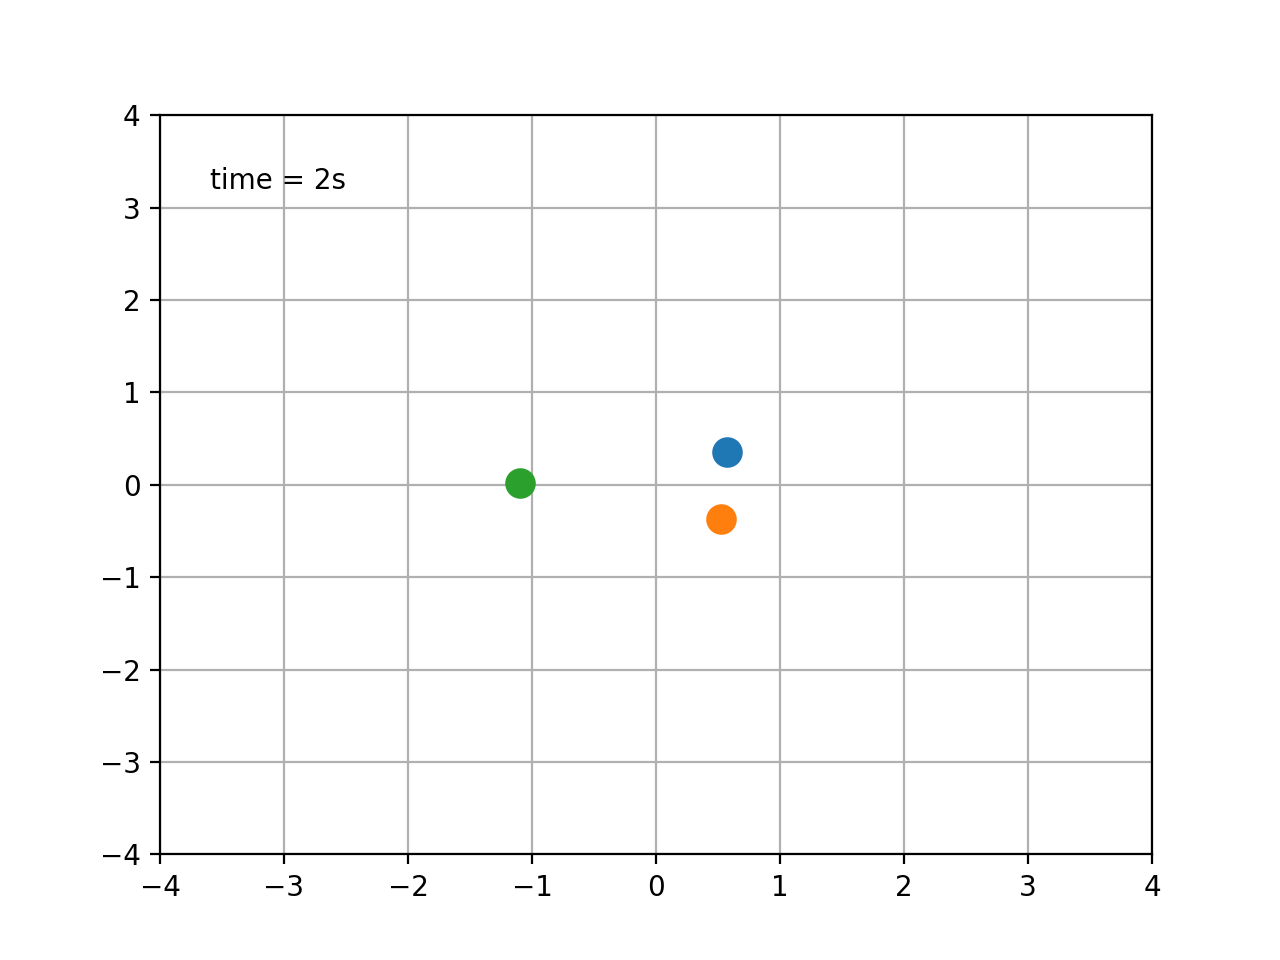

In [7]:
#Create plot
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-4, 4), ylim=(-4, 4))
ax.grid()

#create markers for each body
mA_marker, = ax.plot([], [], 'o-', markersize=10)
mB_marker, = ax.plot([], [], 'o-', markersize=10)
mC_marker, = ax.plot([], [], 'o-', markersize=10)
time_template = 'time = %.0fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

itime = 0

def init():
    mA_marker.set_data([], [])
    mB_marker.set_data([], [])
    mC_marker.set_data([], [])
    time_text.set_text('')
    return mA_marker, mB_marker, mC_marker, time_text

def animate(i):
    mA_marker.set_data(positions[i][0], positions[i][2])
    mB_marker.set_data( positions[i][4], positions[i][6])
    mC_marker.set_data(positions[i][8], positions[i][10])
    time_text.set_text(time_template % (i*dt))
    return mA_marker, mB_marker, mC_marker,time_text

#Create animations
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(time_interval)),
                                         interval=200, blit=True, init_func=init)